**1. Import Lib**

In [ ]:
!pip install opencv-python-headless
!pip install dlib
!pip install imutils
!pip install tensorflow


**Bước 2: Huấn luyện mô hình predict Age**

2.0 Setup

In [ ]:
from google.colab import files
files.upload()


In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d jangedoo/utkface-new
!unzip utkface-new.zip -d UTKFace


Streaming output truncated to the last 5000 lines.
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.

2.1 Load lib and data

In [ ]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# Đường dẫn đến thư mục ảnh
data_path = 'UTKFace/UTKFace'

# Đọc ảnh và nhãn
images = []
ages = []

for img_name in tqdm(os.listdir(data_path)):
    if img_name.endswith('.jpg'):
        age = int(img_name.split('_')[0])  # Lấy tuổi từ tên tệp
        img_path = os.path.join(data_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))  # Resize ảnh về kích thước 64x64
        img = img.astype('float32') / 255.0  # Chuẩn hóa ảnh
        images.append(img)
        ages.append(age)

images = np.array(images)
ages = np.array(ages)


2.2 Huấn luyện mô hình

In [ ]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(images, ages, test_size=0.2, random_state=42)

# Xây dựng mô hình CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Dự đoán một giá trị tuổi
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Huấn luyện mô hình
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)



Epoch 1/10
593/593 [==============================] - 129s 214ms/step - loss: 391.5542 - mae: 15.0636 - val_loss: 223.5102 - val_mae: 11.6858
Epoch 2/10
593/593 [==============================] - 122s 206ms/step - loss: 243.3970 - mae: 11.7800 - val_loss: 204.7744 - val_mae: 10.4136
Epoch 3/10
593/593 [==============================] - 126s 212ms/step - loss: 199.7268 - mae: 10.6549 - val_loss: 174.8858 - val_mae: 10.3583
Epoch 4/10
593/593 [==============================] - 124s 209ms/step - loss: 170.5728 - mae: 9.7320 - val_loss: 122.5214 - val_mae: 8.3099
Epoch 5/10
593/593 [==============================] - 123s 208ms/step - loss: 155.1745 - mae: 9.2416 - val_loss: 116.3858 - val_mae: 8.0544
Epoch 6/10
593/593 [==============================] - 120s 202ms/step - loss: 138.5831 - mae: 8.7349 - val_loss: 107.1360 - val_mae: 7.4101
Epoch 7/10
593/593 [==============================] - 122s 206ms/step - loss: 134.1592 - mae: 8.5138 - val_loss: 123.4818 - val_mae: 7.9775
Epoch 8/10
593

2.3 Lưu mô hình

In [ ]:
# Lưu mô hình đã huấn luyện
model.save('age_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Bước 3: Gọi mô hình**

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.output import eval_js
from IPython.display import display, Javascript
from tensorflow.keras.models import load_model
import base64

# Load the pre-trained age prediction model
model = load_model('age_prediction_model.h5')

OSError: No file or directory found at age_prediction_model.h5

**Bước 4: Phát hiện gương mặt và dự đoán tuổi theo thời gian thực**

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 21ms/step
Photo saved as: photo.jpg


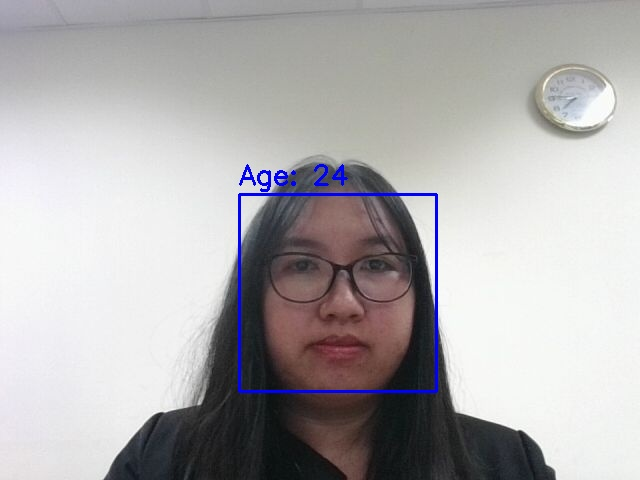

In [ ]:


# Load the Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to preprocess the image for the model
def preprocess_image(img):
    img = cv2.resize(img, (64, 64))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Function to detect faces and predict age
def predict_age(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        processed_image = preprocess_image(face)
        age = model.predict(processed_image)[0][0]
        label = f'Age: {int(age)}'

        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return frame

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
    js = Javascript('''
        async function createVideoStream(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

# Function to convert JavaScript Image to OpenCV Image
def js_to_image(js_image):
    img_data = base64.b64decode(js_image.split(',')[1])
    np_array = np.frombuffer(img_data, np.uint8)
    return cv2.imdecode(np_array, cv2.IMREAD_COLOR)

# Function to take photo and predict age
def take_photo(filename='photo.jpg', quality=0.8):
    js_frame_data = eval_js('createVideoStream({})'.format(quality))
    frame = js_to_image(js_frame_data)
    if frame is not None:
        frame = predict_age(frame)
        cv2.imwrite(filename, frame)

    return filename

# Load video stream and start processing video
video_stream()

# Capture photo and predict age
filename = take_photo()
print(f"Photo saved as: {filename}")

# Display the saved photo with age prediction
from google.colab.patches import cv2_imshow
photo = cv2.imread(filename)
cv2_imshow(photo)

cv2.destroyAllWindows()
